In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nb
import seaborn as sns

with open('pilots_ru_dm_list.txt', 'r') as file:
    sub_list = file.readlines()
good_subjects_list = [line.strip() for line in sub_list]

In [3]:
for sub in good_subjects_list:
    %run pilot.py -s $sub -p a4a5 -f concatspeech -o -d 0 -r


KeyboardInterrupt

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1482687a0610>>
Traceback (most recent call last):
  File "/om2/user/jsmentch/anaconda/envs/hbn_asd/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
KeyboardInterrupt: 

KeyboardInterrupt



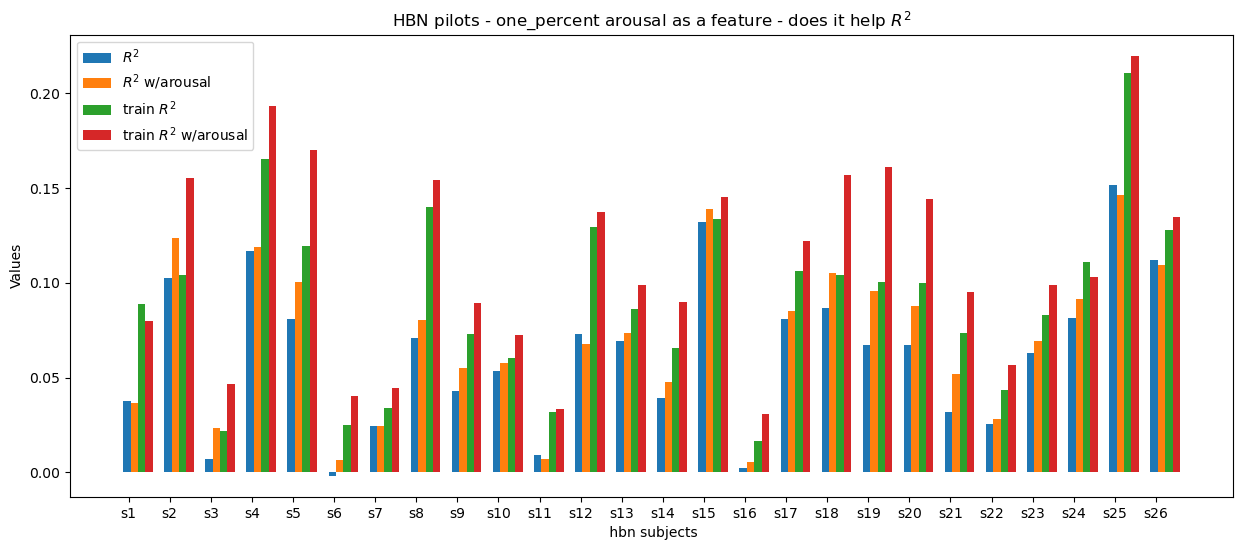

/tmp/ipykernel_3423632/3377215530.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['$R^2$','$R^2$ w/arousal','train $R^2$','train $R^2$ w/arousal'])


[Text(0, 0, '$R^2$'),
 Text(1, 0, '$R^2$ w/arousal'),
 Text(2, 0, 'train $R^2$'),
 Text(3, 0, 'train $R^2$ w/arousal')]

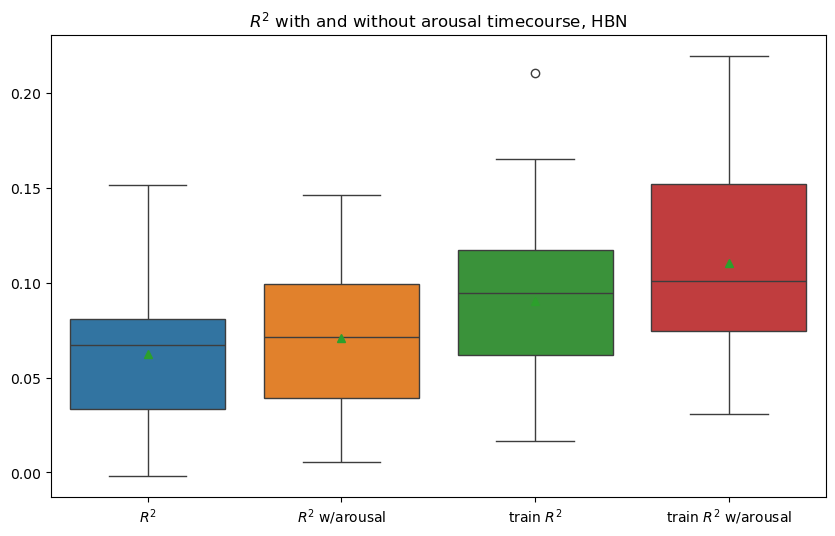

In [6]:
r2=[]
r2_v1=[]
r2_train=[]
r2_v1_train=[]
for sub in good_subjects_list:
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_ridgecv.npz')
    r2.append(np.mean(loaded['stacked_r2s']))
    r2_train.append(np.mean(loaded['train_r2_list']))
    loaded=np.load(f'../good_pilots_new/sub-{sub}_roi-a4a5_feat-concatspeech_delay-0_arousal_ridgecv.npz')
    r2_v1.append(np.mean(loaded['stacked_r2s']))
    r2_v1_train.append(np.mean(loaded['train_r2_list']))




# Number of groups
N = len(r2)

# List of all lists
#data = [[f/max(r2_list_sorted) for f in r2_list_sorted], [f/max(noise_ceiling_sorted) for f in noise_ceiling_sorted], [f/max(mriqc_fd_mean_list_sorted) for f in mriqc_fd_mean_list_sorted], [f/max(mean_fd_sorted) for f in mean_fd_sorted]]
data=[r2,r2_v1,r2_train,r2_v1_train]


# Number of bars in each group
num_bars = len(data)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(15, 6))

# Set the positions of the groups and width of the bars
ind = np.arange(N)
width = 0.18
#labels=['$R^2$',f'Subject Specific Mean Noise Ceiling (r={noise_ceiling_r:.02f})',f'MRIQC mean FD (r={mriqc_fd_mean_list_r:.02f})', f'fMRIPrep Mean FD (r={mean_fd_r:.02f})']
labels=['$R^2$','$R^2$ w/arousal','train $R^2$','train $R^2$ w/arousal']
# Create bars for each list
for i, lst in enumerate(data):
    ax.bar(ind + i*width, lst, width, label=f'{labels[i]}')

# Add labels, title, and legend
ax.set_xlabel(' hbn subjects')
ax.set_ylabel('Values')
ax.set_title('HBN pilots - one_percent arousal as a feature - does it help $R^2$')
ax.set_xticks(ind + width / num_bars)
ax.set_xticklabels([f's{i+1}' for i in range(N)])
ax.legend()

# Show the plot
plt.show()





fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(data,showmeans=True)
plt.title(f'$R^2$ with and without arousal timecourse, HBN')
ax.set_xticklabels(['$R^2$','$R^2$ w/arousal','train $R^2$','train $R^2$ w/arousal'])